In [1]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from src.utils_for_estimate import (get_points,
                                    get_image_center,
                                    )
from src.shadow_height_estimator import (
                                        attach_heights, 
                                        rotate_points,
                                        estimate_buildings_height,
                                       
                                        )
from src.visualization_masks import (draw_masks,
                                    draw_random_masks,
                                    draw_sample_building_shadow,
                                    )
from src.annotations.annotation import coco2masks, anns_and_images, attach_bboxes
import numpy as np

In [2]:
dataset_dir = '../3d_tools_dataset/'
annot_file = dataset_dir + 'annotations/instances_default.json'
images_directory = dataset_dir + 'image_png/'
image_directory = dataset_dir + 'image_png/test_1.png'

In [3]:
SCALE = np.float16(0.1)
SUN_AZIMUTH_ANGLE = np.uint8(100)
SUN_ELEVATION_ANGLE = np.uint8(30)
ROTATE_ANGLE = 360.0 - (SUN_AZIMUTH_ANGLE + 90.0)
THRESHOLD = np.uint8(7)
BROWN = (np.uint8(128), np.uint8(64), np.uint8(48))
BLUE = (np.uint8(0), np.uint8(0), np.uint8(255))
COLORS = np.array([BROWN, BLUE])

In [4]:
image, anns = anns_and_images(coco_annotation_file=annot_file, images_directory=images_directory)
masks = coco2masks(coco_annotation_file=annot_file, images_directory=images_directory)

shadows_points = get_points(anns)[0]
building_points = get_points(anns)[1]

# shadows_bboxes = attach_bboxes(shadows_points, building_points, anns)[0]
# building_bboxes = attach_bboxes(shadows_points, building_points, anns)[1]

center = get_image_center(image_path=image_directory)
# rotated_points_of_shadows = rotate_points(points=shadows_points, center=center, rotate_angle=ROTATE_ANGLE)
# rotated_points_of_building = rotate_points(points=building_points, center=center, rotate_angle=ROTATE_ANGLE)
# # rotated_bbox = rotate_point()

# shadows_heigth = estimate_buildings_height(rotated_points_of_shadows, SCALE, SUN_ELEVATION_ANGLE)
# print(anns[1]['bbox'])
print(shadows_points)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
(2331.5, 1258.0)


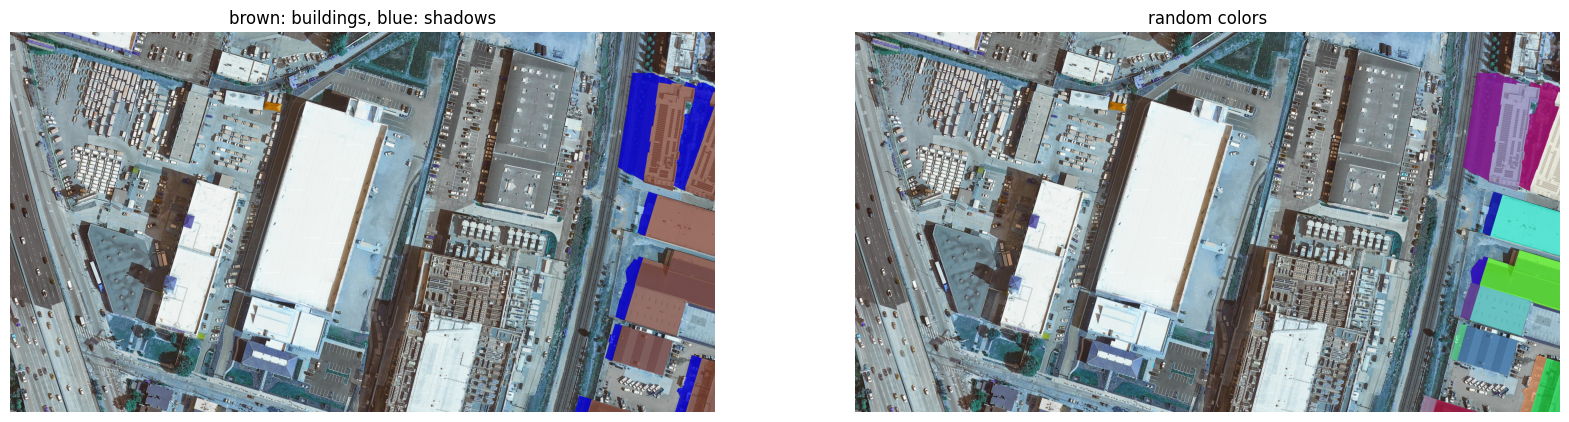

In [5]:
segment = draw_masks(image[0], masks, COLORS)
random_segment = draw_random_masks(image[0], masks)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,10))

ax[0].imshow(segment)
ax[0].set_title('brown: buildings, blue: shadows')
ax[0].set_axis_off()

ax[1].imshow(random_segment)
ax[1].set_title('random colors')
ax[1].set_axis_off()

plt.show()

In [6]:
rotated_image = rotate(image[0], ROTATE_ANGLE)
rotated_masks = rotate_masks(masks, ROTATE_ANGLE)

rotated_segment = draw_masks(rotated_image, rotated_masks, COLORS)
rotated_random_segment = draw_random_masks(rotated_image, rotated_masks)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,10))

ax[0].imshow(rotated_segment)
ax[0].set_title('brown: buildings, blue: shadows (rotated)')
ax[0].set_axis_off()

ax[1].imshow(rotated_random_segment)
ax[1].set_title('rotated random colors')
ax[1].set_axis_off()

plt.show()

NameError: name 'rotate_masks' is not defined

In [ ]:
# list of rotated masks shadows + buildings
rotated_masks = rotate_masks(masks, ROTATE_ANGLE)

# dict of heights {index of shadow: estimated height}
building_heights = estimate_building_heights(masks, SUN_AZIMUTH_ANGLE, SCALE, SUN_ELEVATION_ANGLE)
print('building_heights', building_heights)

# dict {index of shadow: (max(y), mean(x))}
indices_shadows = take_indices_shadows(rotated_masks)
print('indices_shadows', indices_shadows)

# dict {'building_heights': {index of building: [estimated heights]}, 'building_shadow': {index of building: [indices of shadows]}}
building_heights_shadows = attach_heights(rotated_masks, building_heights, indices_shadows, THRESHOLD)
print('building_heights_shadows', building_heights_shadows)

result_dict = {}
for idx_building, heights in building_heights_shadows['building_heights'].items():
    result_dict[idx_building] = {'mask': masks[idx_building], 'heights': heights}

print('result_dict', result_dict)

In [ ]:
hyperparameters = {'masks': masks,
                'sun_azimuth_angle': SUN_AZIMUTH_ANGLE,
                'scale': SCALE,
                'sun_elevation_angle': SUN_ELEVATION_ANGLE,
                'threshold': THRESHOLD
                }

In [ ]:
build_info = buildings_info(hyperparameters)
print(build_info)

In [ ]:
sample_segment = draw_sample_building_shadow(rotated_image, rotated_masks, building_heights_shadows['building_shadow'], COLORS)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

ax.imshow(sample_segment)
ax.set_title('brown: buildings, blue: shadows (sample of building+shadow)')
ax.set_axis_off()

plt.show()